### 2.6.1 基本概率论



In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
# 各1/6概率， 取一次样本
fair_probs = torch.ones([6]) /6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [3]:
# 取1000次

counts = multinomial.Multinomial(1000, fair_probs).sample()
# 概率
counts / 1000

tensor([0.1590, 0.1730, 0.1710, 0.1660, 0.1750, 0.1560])

<function matplotlib.pyplot.show(close=None, block=None)>

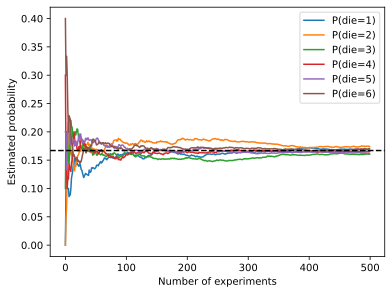

In [6]:
# 500 次实验，每次 10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 求前缀和，把每次结果累加起来
cum_count = counts.cumsum(dim=0)

# 每个的次数 / 总次数  ， 估计概率
estimates = cum_count / cum_count.sum(dim=1, keepdim=True) 

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')

d2l.plt.gca().set_xlabel('Number of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
d2l.plt.show